In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
covid_df = pd.read_csv("../data/covid_19_data.csv")
covid_df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [40]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [41]:
covid_df.value_counts()

Date       State     Region          Confirmed  Deaths  Recovered
4/29/2020  Alabama   US              6912       256     0            1
           Alaska    US              355        9       0            1
           Alberta   Canada          5165       87      0            1
           Anguilla  UK              3          0       3            1
           Anhui     Mainland China  991        6       985          1
                                                                    ..
           Wyoming   US              545        7       0            1
           Xinjiang  Mainland China  76         3       73           1
           Yukon     Canada          11         0       0            1
           Yunnan    Mainland China  185        2       181          1
           Zhejiang  Mainland China  1268       1       1263         1
Name: count, Length: 140, dtype: int64

In [42]:
covid_df.describe()

,Confirmed,Deaths,Recovered
count,321.000000,321.000000,321.000000
mean,9949.800623,709.152648,3030.277259
std,31923.853086,3236.162817,14364.870365
min,0.000000,0.000000,0.000000
25%,104.000000,2.000000,2.000000
50%,653.000000,12.000000,73.000000
75%,4655.000000,144.000000,587.000000
max,299691.000000,27682.000000,132929.000000


Notes on the Dataset:
-Change Region to Country
-How to change State column that has "NaN" in to None or Not Applicable?


In [43]:
covid_df.sort_values(by=['Confirmed', 'Recovered'], ascending=[True,False])

,Date,State,Region,Confirmed,Deaths,Recovered
285,4/29/2020,Recovered,US,0,0,120720
284,4/29/2020,Recovered,Canada,0,0,20327
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
305,4/29/2020,Tibet,Mainland China,1,0,1
289,4/29/2020,Saint Pierre and Miquelon,France,1,0,0
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


In [44]:
covid_df.loc[0:100,['State','Region']]

,State,Region
0,NaN,Afghanistan
1,NaN,Albania
2,NaN,Algeria
3,NaN,Andorra
4,NaN,Angola
...,...,...
96,NaN,Lithuania
97,NaN,Luxembourg
98,NaN,MS Zaandam
99,NaN,Madagascar


In [45]:
covid_df.rename(columns={'Region':'Country'}, inplace=True)
covid_df.head()

,Date,State,Country,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


This is where I'm starting to do Exploratory Data Analysis

In [46]:
covid_df.isnull
#Starting to look at missing Data

<bound method DataFrame.isnull of           Date     State         Country  Confirmed  Deaths  Recovered
0    4/29/2020       NaN     Afghanistan       1939      60        252
1    4/29/2020       NaN         Albania        766      30        455
2    4/29/2020       NaN         Algeria       3848     444       1702
3    4/29/2020       NaN         Andorra        743      42        423
4    4/29/2020       NaN          Angola         27       2          7
..         ...       ...             ...        ...     ...        ...
316  4/29/2020   Wyoming              US        545       7          0
317  4/29/2020  Xinjiang  Mainland China         76       3         73
318  4/29/2020     Yukon          Canada         11       0          0
319  4/29/2020    Yunnan  Mainland China        185       2        181
320  4/29/2020  Zhejiang  Mainland China       1268       1       1263

[321 rows x 6 columns]>

In [47]:
covid_df.isnull().sum()

Date           0
State        181
Country        0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [48]:
covid_df.fillna('Unknown')
#filling "NaN" with "Unknown"

,Date,State,Country,Confirmed,Deaths,Recovered
0,4/29/2020,Unknown,Afghanistan,1939,60,252
1,4/29/2020,Unknown,Albania,766,30,455
2,4/29/2020,Unknown,Algeria,3848,444,1702
3,4/29/2020,Unknown,Andorra,743,42,423
4,4/29/2020,Unknown,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [49]:
covid_df.dtypes
#Just curious how many types there are and I'm looking at how many columns in total

Date         object
State        object
Country      object
Confirmed     int64
Deaths        int64
Recovered     int64
dtype: object

In [50]:
covid_df['Country'] = covid_df['Country'].replace('Mainland China','China')
#Replacing "Mainland China" w/ China

 Since all of this COVID data was recorded during the first wave of the Pandemic
 I've decided to look at COVID cases between three countries: US, China, Canada
 I also wanted to see who had the highest cases and see if the COVID safely practices made a huge diffrence between these three countries.

In [51]:
filter_df = covid_df[covid_df['Country'].str.contains('US')]
filter_df
#filtering COVID cases to the U.S.

,Date,State,Country,Confirmed,Deaths,Recovered
181,4/29/2020,Alabama,US,6912,256,0
182,4/29/2020,Alaska,US,355,9,0
186,4/29/2020,Arizona,US,7209,308,0
187,4/29/2020,Arkansas,US,3193,57,0
195,4/29/2020,California,US,48747,1946,0
199,4/29/2020,Colorado,US,14758,766,0
200,4/29/2020,Connecticut,US,26767,2169,0
202,4/29/2020,Delaware,US,4655,144,0
204,4/29/2020,Diamond Princess cruise ship,US,49,0,0
205,4/29/2020,District of Columbia,US,4106,205,0


In [52]:
filter2_df = covid_df[covid_df['Country'].str.contains('Canada')]
filter2_df
#filtering COVID Case in Canada

,Date,State,Country,Confirmed,Deaths,Recovered
183,4/29/2020,Alberta,Canada,5165,87,0
193,4/29/2020,British Columbia,Canada,2087,109,0
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
215,4/29/2020,Grand Princess,Canada,13,0,0
246,4/29/2020,Manitoba,Canada,275,6,0
259,4/29/2020,New Brunswick,Canada,118,0,0
266,4/29/2020,Newfoundland and Labrador,Canada,258,3,0
272,4/29/2020,Northwest Territories,Canada,5,0,0
273,4/29/2020,Nova Scotia,Canada,935,28,0
276,4/29/2020,Ontario,Canada,16978,1153,0


In [53]:
filter3_df = covid_df[covid_df['Country'].str.contains('China')]
filter3_df
#Filtered COVID cases in China

,Date,State,Country,Confirmed,Deaths,Recovered
185,4/29/2020,Anhui,China,991,6,985
190,4/29/2020,Beijing,China,593,9,542
198,4/29/2020,Chongqing,China,579,6,573
211,4/29/2020,Fujian,China,355,1,353
212,4/29/2020,Gansu,China,139,2,137
220,4/29/2020,Guangdong,China,1588,8,1557
221,4/29/2020,Guangxi,China,254,2,252
222,4/29/2020,Guizhou,China,147,2,145
223,4/29/2020,Hainan,China,168,6,162
225,4/29/2020,Hebei,China,328,6,318


Originally, I was trying to plot bar graph of confirmed COVID cases between three countries(China, US, and Canada). But I had a hard time filtering the string down to three countries. So I decided to plot 3 bar graphs. One of each country, breaking it down to Provinces/Region/State.

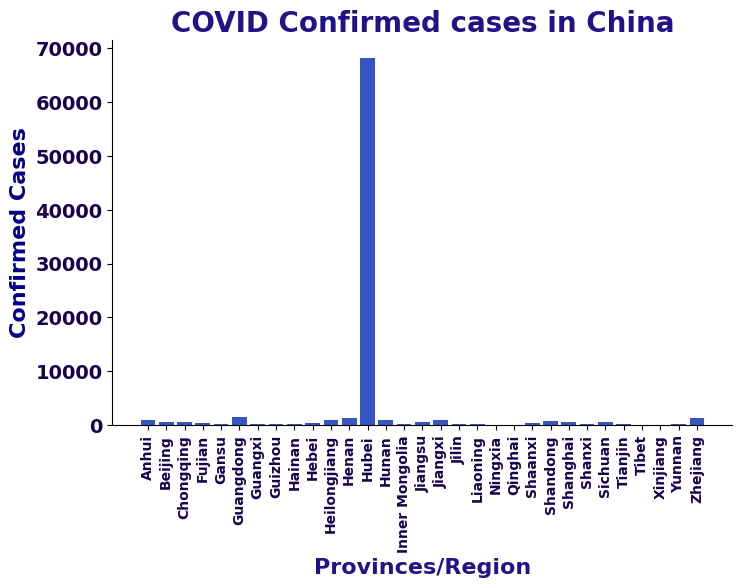

In [62]:
plt.figure(figsize=(8,5))
recover_cases = covid_df.groupby('Country')["Recovered"].sum().reset_index()
filter_string = 'China'
string_df = covid_df[covid_df['Country'] == filter_string]


colors = ["red","orange","yellow","green","blue","purple"]

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.bar(string_df['State'], string_df['Confirmed'],
        color="#022BB3", linewidth=2,alpha=0.8)
#plt.ylim(0, 13100)
plt.title("COVID Confirmed cases in China", fontsize=20, fontweight="bold", color="#221287")
plt.grid(True, which='minor',axis = 'y', color='black', linestyle='-', linewidth=0.5)
plt.xlabel("Provinces/Region", fontsize=16, fontweight="bold", color="#221287")
plt.ylabel("Confirmed Cases", fontsize=16, fontweight="bold", color="darkblue")
plt.xticks(rotation=90, fontsize=10, fontweight="bold", color="#18024E")
plt.yticks(fontsize=14, fontweight="bold", color="#18024E")
plt.show()

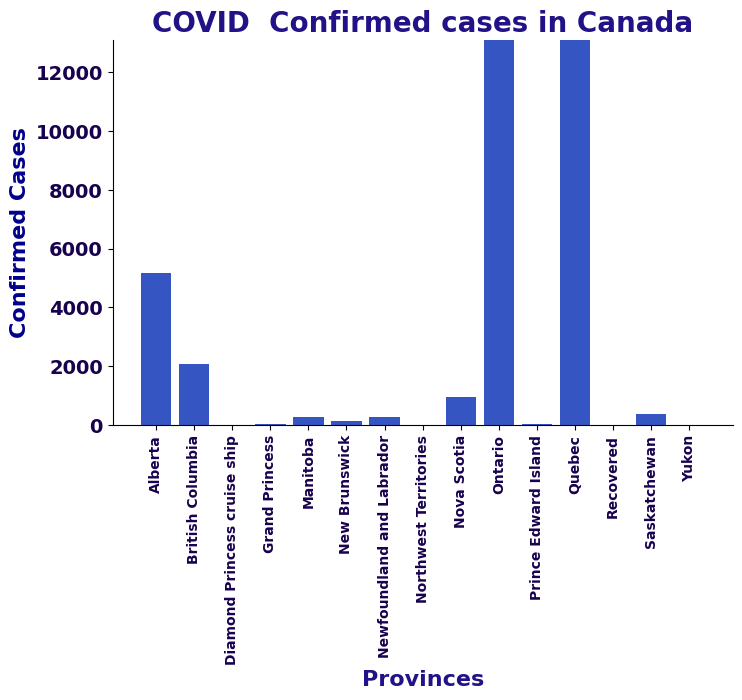

In [63]:
plt.figure(figsize=(8,5))
recover_cases = covid_df.groupby('Country')["Recovered"].sum().reset_index()
filter_string = 'Canada'
string_df = covid_df[covid_df['Country'] == filter_string]


colors = ["red","orange","yellow","green","blue","purple"]

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.bar(string_df['State'], string_df['Confirmed'],
        color="#022BB3", linewidth=2,alpha=0.8)
plt.ylim(0, 13100)
plt.title("COVID  Confirmed cases in Canada", fontsize=20, fontweight="bold", color="#221287")
plt.grid(True, which='minor',axis = 'y', color='black', linestyle='-', linewidth=0.5)
plt.xlabel("Provinces", fontsize=16, fontweight="bold", color="#221287")
plt.ylabel("Confirmed Cases", fontsize=16, fontweight="bold", color="darkblue")
plt.xticks(rotation=90, fontsize=10, fontweight="bold", color="#18024E")
plt.yticks(fontsize=14, fontweight="bold", color="#18024E")
plt.show()

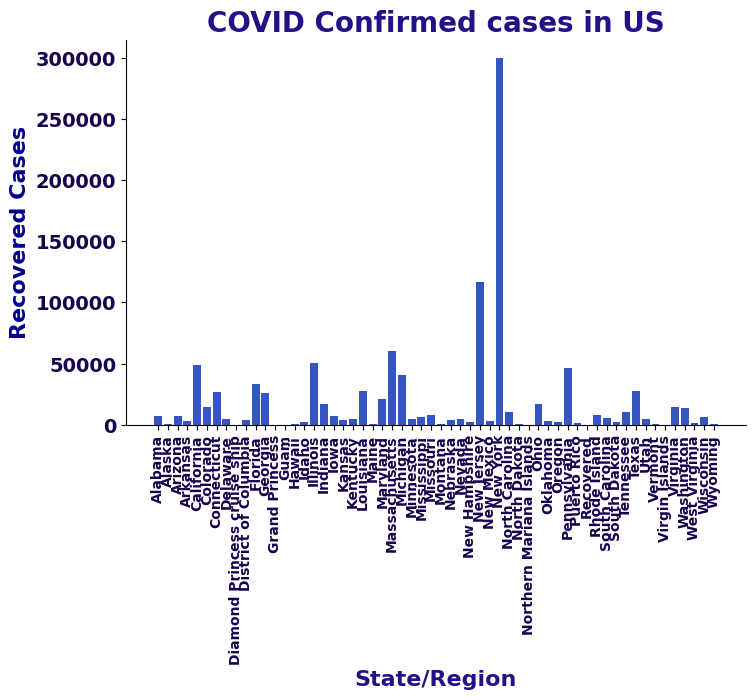

In [66]:
plt.figure(figsize=(8,5))
recover_cases = covid_df.groupby('Country')["Recovered"].sum().reset_index()
filter_string = 'US'
string_df = covid_df[covid_df['Country'] == filter_string]


colors = ["red","orange","yellow","green","blue","purple"]

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.bar(string_df['State'], string_df['Confirmed'],
        color="#022BB3", linewidth=2,alpha=0.8)
#plt.ylim(0, 13100)
plt.title("COVID Confirmed cases in US", fontsize=20, fontweight="bold", color="#221287")
plt.grid(True, which='minor',axis = 'y', color='black', linestyle='-', linewidth=0.5)
plt.xlabel("State/Region", fontsize=16, fontweight="bold", color="#221287")
plt.ylabel("Recovered Cases", fontsize=16, fontweight="bold", color="darkblue")
plt.xticks(rotation=90, fontsize=10, fontweight="bold", color="#18024E")
plt.yticks(fontsize=14, fontweight="bold", color="#18024E")
plt.show()

It's a rough start. I'm still working on trying to filter out some regions. Otherwise I'm gonna try to keep working on how to narrow down the cases to the three countries